In [3]:
from simtk import unit
from simtk.openmm import app
import simtk.openmm as openmm

import openmmtools.testsystems
import openmmMC.integrators
import openmmMC.testsystems

import sys
import mdtraj

In [4]:
testsystem = openmmMC.testsystems.Water()

In [7]:
# PARAMETERS

MDStep = 10
timestep = 2*unit.femtosecond
temperature = 300*unit.kelvin
seed = 32870

h5_out = 'Data/water1_test.h5'
pdb_out = 'Data/water1_test.pdb'
summary_out = sys.stdout

platform_name = 'Reference'

# Can run on CUDA, Reference, OpenCl and CPU

# Load the system

testsystem = openmmMC.testsystems.Water()
# Implicit = solvent represented as a continuous medium instead of explicit solvent molecules
system, topology = testsystem.system, testsystem.topology

# system, topology, waterbox = testsystem.system, testsystem.topology, testsystem.waterbox ???

# set up the integrator

integrator = openmmMC.integrators.VelocityVerletIntegrator(timestep)

# set the Platform

platform = openmm.Platform.getPlatformByName(platform_name)

# set up simulation

simulation = app.Simulation(topology, system, integrator, platform)

# set initial velocities and positions

simulation.context.setPositions(testsystem.positions)
simulation.context.setVelocitiesToTemperature(temperature, seed)

# set up simulation reporter, to write trajectories to a file

simulation.reporters.append(app.StateDataReporter(summary_out,
                                                  MDStep/10,
                                                  progress=True,
                                                  remainingTime=True,
                                                  totalSteps=MDStep))
h5_reporter = mdtraj.reporters.HDF5Reporter(h5_out, 1)
simulation.reporters.append(h5_reporter)
simulation.reporters.append(app.PDBReporter(pdb_out,1))

# RUN SIMULATION

simulation.step(MDStep)

h5_reporter.close()

#"Progress (%)","Time Remaining"
10.0%,--
20.0%,0:00
30.0%,0:00
40.0%,0:00
50.0%,0:00
60.0%,0:00
70.0%,0:00
80.0%,0:00
90.0%,0:00
100.0%,0:00


In [8]:
ls Data

aladip_NVE_test.h5         TolueneImplicit_test.h5   water_test.h5
aladip_NVE_test.pdb        TolueneImplicit_test.pdb  Water_test.h5
aladip_NVE_test_water.h5   water1_test.h5            water_test.pdb
aladip_NVE_test_water.pdb  water1_test.pdb           Water_test.pdb


Using AlanineDipeptideExplicit() added a waterbox to the simulation. Running without waterbox = openmmtools.testsystems.WaterBox() so see if this has an effect on the simulation:

In [9]:
TRJ = mdtraj.load_hdf5('Data/water1_test.h5')

In [15]:
TRJ.xyz[:,1,0]

array([-0.42662221, -0.42929098, -0.43176228, -0.42997628, -0.42774227,
       -0.42965168, -0.4323172 , -0.43087906, -0.42821619, -0.42900118], dtype=float32)

In [16]:
ROH = mdtraj.compute_distances(TRJ, [[0, 1]])

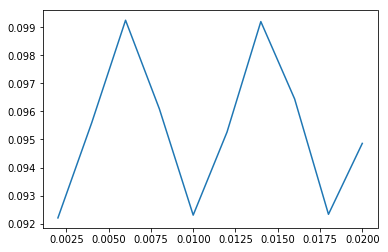

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(TRJ.time, ROH)

In [18]:
HOH = mdtraj.compute_angles(TRJ, [[1, 0, 2]])

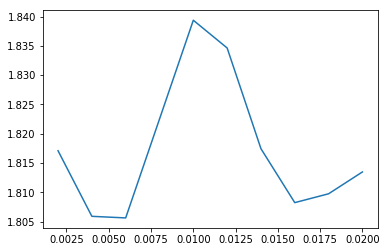

In [19]:
plt.plot(TRJ.time, HOH)

In [5]:
MDStep = 10
timestep = 2*unit.femtosecond
temperature = 300*unit.kelvin
seed = 32870

h5_out = 'Data/aladip_NVE_test_water.h5'
pdb_out = 'Data/aladip_NVE_test_water.pdb'
summary_out = sys.stdout

platform_name = 'Reference'

testsystem = openmmtools.testsystems.AlanineDipeptideExplicit()
system, topology = testsystem.system, testsystem.topology

integrator = openmmMC.integrators.VelocityVerletIntegrator(timestep)

platform = openmm.Platform.getPlatformByName(platform_name)

simulation = app.Simulation(topology, system, integrator, platform)

simulation.context.setPositions(testsystem.positions)
simulation.context.setVelocitiesToTemperature(temperature, seed)

simulation.reporters.append(app.StateDataReporter(summary_out,
                                                  MDStep/10,
                                                  progress=True,
                                                  remainingTime=True,
                                                  totalSteps=MDStep))
h5_reporter = mdtraj.reporters.HDF5Reporter(h5_out, 1)
simulation.reporters.append(h5_reporter)
simulation.reporters.append(app.PDBReporter(pdb_out,1))

simulation.step(MDStep)

h5_reporter.close()

#"Progress (%)","Time Remaining"
10.0%,--
20.0%,0:01
30.0%,0:01
40.0%,0:01
50.0%,0:01
60.0%,0:00
70.0%,0:00
80.0%,0:00
90.0%,0:00
100.0%,0:00


In [6]:
ls Data

aladip_NVE_test.h5   aladip_NVE_test_water.h5   TolueneImplicit_test.h5
aladip_NVE_test.pdb  aladip_NVE_test_water.pdb  TolueneImplicit_test.pdb


Running with out waterbox = openmmtools.testsystems.WaterBox() also gave a simulation with the waterbox which shows that the line waterbox = openmmtools.testsystems.WaterBox() was unnecessary. The results of the explicit simulation were saved as aladip_NVE_test_water

In [7]:
openmmtools.__path__

['/home/mb17g15/.local/miniconda2/lib/python2.7/site-packages/openmmtools-0.8.3-py2.7.egg/openmmtools']

In [8]:
openmmMC.__path__

['/home/mb17g15/.local/openmm-dfhmc/src/openmmMC']

From testsystems in openmmtools, the waterbox is tip3p explicit solvent

Testing with TolueneImplicit()

In [9]:
MDStep = 10
timestep = 2*unit.femtosecond
temperature = 300*unit.kelvin
seed = 32870

h5_out = 'Data/TolueneImplicit_test.h5'
pdb_out = 'Data/TolueneImplicit_test.pdb'
summary_out = sys.stdout

platform_name = 'Reference'

testsystem = openmmtools.testsystems.TolueneImplicit()
system, topology = testsystem.system, testsystem.topology

integrator = openmmMC.integrators.VelocityVerletIntegrator(timestep)

platform = openmm.Platform.getPlatformByName(platform_name)

simulation = app.Simulation(topology, system, integrator, platform)

simulation.context.setPositions(testsystem.positions)
simulation.context.setVelocitiesToTemperature(temperature, seed)

simulation.reporters.append(app.StateDataReporter(summary_out,
                                                  MDStep/10,
                                                  progress=True,
                                                  remainingTime=True,
                                                  totalSteps=MDStep))
h5_reporter = mdtraj.reporters.HDF5Reporter(h5_out, 1)
simulation.reporters.append(h5_reporter)
simulation.reporters.append(app.PDBReporter(pdb_out,1))

simulation.step(MDStep)

h5_reporter.close()

#"Progress (%)","Time Remaining"
10.0%,--
20.0%,0:00
30.0%,0:00
40.0%,0:00
50.0%,0:00
60.0%,0:00
70.0%,0:00
80.0%,0:00
90.0%,0:00
100.0%,0:00


In [10]:
ls Data

aladip_NVE_test.h5   aladip_NVE_test_water.h5   TolueneImplicit_test.h5
aladip_NVE_test.pdb  aladip_NVE_test_water.pdb  TolueneImplicit_test.pdb


In [11]:
MDStep = 10
timestep = 2*unit.femtosecond
temperature = 300*unit.kelvin
seed = 32870

h5_out = 'Data/Water_test.h5'
pdb_out = 'Data/Water_test.pdb'
summary_out = sys.stdout

platform_name = 'Reference'

testsystem = openmmtools.testsystems.WaterBox()
system, topology = testsystem.system, testsystem.topology

integrator = openmmMC.integrators.VelocityVerletIntegrator(timestep)

platform = openmm.Platform.getPlatformByName(platform_name)

simulation = app.Simulation(topology, system, integrator, platform)

simulation.context.setPositions(testsystem.positions)
simulation.context.setVelocitiesToTemperature(temperature, seed)

simulation.reporters.append(app.StateDataReporter(summary_out,
                                                  MDStep/10,
                                                  progress=True,
                                                  remainingTime=True,
                                                  totalSteps=MDStep))
h5_reporter = mdtraj.reporters.HDF5Reporter(h5_out, 1)
simulation.reporters.append(h5_reporter)
simulation.reporters.append(app.PDBReporter(pdb_out,1))

simulation.step(MDStep)

h5_reporter.close()

#"Progress (%)","Time Remaining"
10.0%,--
20.0%,0:01
30.0%,0:01
40.0%,0:00
50.0%,0:00
60.0%,0:00
70.0%,0:00
80.0%,0:00
90.0%,0:00
100.0%,0:00


In [12]:
ls Data

aladip_NVE_test.h5        aladip_NVE_test_water.pdb  Water_test.h5
aladip_NVE_test.pdb       TolueneImplicit_test.h5    Water_test.pdb
aladip_NVE_test_water.h5  TolueneImplicit_test.pdb
